# Problema 1:

Los siguientes datos

In [28]:
x = np.array([ 3.8058516 ,  4.19437519,  1.37709166,  0.77009889,  5.20968912,
        0.65358179,  3.9701773 ,  2.07495512,  3.02571317,  3.1321825 ,
        3.10005197,  4.94755324,  2.26160675,  0.59817735,  1.19183984,
        1.37467926, -0.61701765,  5.01024433,  3.13300185,  5.2957513 ,
        5.49070323, -1.13532482, -0.34934039,  5.72120588,  1.23276086,
        4.33202401,  4.00250539, -0.40665993,  1.05709082,  3.68821387,
        1.12295318,  2.10739471,  0.53197551, -0.27389039,  1.48139076,
        0.70014346,  2.31649553,  2.44322569,  3.86141784,  2.04558533,
        2.98230541,  3.69456416,  2.35192256,  0.11488102,  1.24948211,
        2.34006925,  1.45962495, -0.09042347, -0.05130358,  1.15963357,
        0.56871108,  2.70715761,  2.47673624,  1.70400014,  1.60709535,
       -0.40534576,  3.07910114,  0.80967033,  5.04007949,  0.11755631,
        1.427098  , -0.07170736,  5.11381387,  3.54324208,  4.39654794,
        0.10687046,  2.89288521,  4.23476606,  1.54499074,  2.68598353,
       -1.02087514,  1.9960533 ,  5.24364406,  3.2185187 , -0.38242978,
        3.49462381,  1.06077727, -0.02623431,  3.92295454,  1.48746264,
        2.74412523, -0.29060423,  3.915251  ,  3.13072888,  3.78471126,
       -0.26904523,  0.66725871,  2.75931047,  2.09460576,  1.15288733,
        3.08004069,  2.51581013,  1.88470954,  3.18040196,  0.85962888,
       -0.2126045 ,  3.2505909 ,  2.7800464 ,  1.41144019,  2.71715232])


es una muestra de una distribución coseno:
$$f(x)=C\frac{1}{2\pi}(1+\cos(x/a-b))$$
para $$-\pi < x/a-b <\pi$$ y donde C es una constante de normalización.

"a" se conoce como la escala y "b" como la localización.

Estima los parámetros "a" y "b" a partir de los datos y da un intervalo de confianza para ellos del 95%.

In [29]:
import numpy as np
import scipy.optimize as opt
import scipy.stats as stats
import matplotlib.pyplot as plt

x = np.array([ 3.8058516 ,  4.19437519,  1.37709166,  0.77009889,  5.20968912,
        0.65358179,  3.9701773 ,  2.07495512,  3.02571317,  3.1321825 ,
        3.10005197,  4.94755324,  2.26160675,  0.59817735,  1.19183984,
        1.37467926, -0.61701765,  5.01024433,  3.13300185,  5.2957513 ,
        5.49070323, -1.13532482, -0.34934039,  5.72120588,  1.23276086,
        4.33202401,  4.00250539, -0.40665993,  1.05709082,  3.68821387,
        1.12295318,  2.10739471,  0.53197551, -0.27389039,  1.48139076,
        0.70014346,  2.31649553,  2.44322569,  3.86141784,  2.04558533,
        2.98230541,  3.69456416,  2.35192256,  0.11488102,  1.24948211,
        2.34006925,  1.45962495, -0.09042347, -0.05130358,  1.15963357,
        0.56871108,  2.70715761,  2.47673624,  1.70400014,  1.60709535,
       -0.40534576,  3.07910114,  0.80967033,  5.04007949,  0.11755631,
        1.427098  , -0.07170736,  5.11381387,  3.54324208,  4.39654794,
        0.10687046,  2.89288521,  4.23476606,  1.54499074,  2.68598353,
       -1.02087514,  1.9960533 ,  5.24364406,  3.2185187 , -0.38242978,
        3.49462381,  1.06077727, -0.02623431,  3.92295454,  1.48746264,
        2.74412523, -0.29060423,  3.915251  ,  3.13072888,  3.78471126,
       -0.26904523,  0.66725871,  2.75931047,  2.09460576,  1.15288733,
        3.08004069,  2.51581013,  1.88470954,  3.18040196,  0.85962888,
       -0.2126045 ,  3.2505909 ,  2.7800464 ,  1.41144019,  2.71715232])

def coseno_pdf(x, a, b):
    return (1 / (2 * np.pi * a)) * (1 + np.cos((x - b) / a))

def neg_log_likelihood(params, x):
    a, b = params
    pdf_values = coseno_pdf(x, a, b)
    return -np.sum(np.log(pdf_values + 1e-10))

initial_b = np.mean(x)
initial_a = np.std(x)

initial_guess = [initial_a, initial_b]

result = opt.minimize(neg_log_likelihood, initial_guess, args=(x,), method='BFGS')

a_est, b_est = result.x

#cov_matrix = result.hess_inv
errors = np.sqrt(np.diag(cov_matrix))

intervalo_a = (a_est - 1.96 * errors[0], a_est + 1.96 * errors[0])
intervalo_b = (b_est - 1.96 * errors[1], b_est + 1.96 * errors[1])

print(f"Estimación de a: {a_est:.3f} con intervalo de confianza: {intervalo_a}")
print(f"Estimación de b: {b_est:.3f} con intervalo de confianza: {intervalo_b}")

Estimación de a: 1.438 con intervalo de confianza: (1.2745987800895846, 1.601163538070328)
Estimación de b: 2.181 con intervalo de confianza: (1.8788066289611152, 2.4836512560614885)


# Problema 2:

Con la misma secuencia de datos del problema anterior x. I**magína que no conoces la distribución de donde proviene la muestra**. Estima el primer momento de la distribución $\mu=\bar{x}$ (promedio) y enstima el intervalo de confianza del 95%.

In [30]:
mu_hat = np.mean(x)
sigma_hat = np.std(x, ddof=1)
n = len(x)
se_mu = sigma_hat / np.sqrt(n)

alpha = 0.05
t_value = stats.t.ppf(1 - alpha/2, df=n-1)

ci_lower = mu_hat - t_value * se_mu
ci_upper = mu_hat + t_value * se_mu

print(f"Estimación de la media (mu): {mu_hat}")
print(f"Intervalo de confianza del 95%: ({ci_lower}, {ci_upper})")

Estimación de la media (mu): 2.1342042433999997
Intervalo de confianza del 95%: (1.795202751766069, 2.4732057350339307)


# Problema 3:
Un fabricante farmacéutico compra materias primas de dos proveedores diferentes. El nivel medio de impurezas es aproximadamente el mismo para ambos proveedores, pero el fabricante está preocupado por la variabilidad en la cantidad de impurezas de entre un embarque y otro. Si el nivel de impurezas tiende a variar en forma excesiva de una fuente de abastecimiento, esto podría afectar la calidad del producto final. Para comparar la variación en el porcentaje de impurezas para los dos proveedores, el fabricante selecciona diez envíos de cada uno de ellos y mide el porcentaje de impurezas de cada envío. Las varianzas muestrales fueron s2 1 = .273 y s2 2 = .094 respectivamente. Forme un intervalo de confianza de 95% para la relación entre las varianzas poblacionales reales.

In [31]:
s1 = 0.273
s2 = 0.094
n1 = 10
n2 = 10
alpha = 0.05

F = s1 / s2
df1 = n1 - 1
df2 = n2 - 1

F_inferior = stats.f.ppf(1 - alpha/2, df1, df2)
F_superior = stats.f.ppf(alpha/2, df1, df2)

CI_inferior = F / F_inferior
CI_superior = F / F_superior

print(f"Razón de varianzas (F): {F}")
print(f"Intervalo de confianza del 95% para la relación de varianzas: ({CI_inferior}, {CI_superior})")

Razón de varianzas (F): 2.904255319148936
Intervalo de confianza del 95% para la relación de varianzas: (0.7213759396977254, 11.692514949055882)


# Problema 4:
Una encuesta a 415 ejecutivos corporativos, de gobierno y contadores de la Financial Accounting Foundation encontró que 278 consideraban el flujo de caja (lo contrario de ganancias por acción, etc.) como el indicador más importante de la salud financiera de una compañía. Suponga que estos 415 ejecutivos constituyen una muestra aleatoria de la población de todos los ejecutivos. Use los datos para hallar un intervalo de confianza de 95% para la fracción de todos los ejecutivos corporativos que consideran que el flujo de caja es la medida más importante de la salud financiera de una compañía.

In [32]:
import math

n = 415
x = 278

p_hat = x / n

z_alpha = stats.norm.ppf(1 - 0.05 / 2)

std_error = math.sqrt(p_hat * (1 - p_hat) / n)

margin_of_error = z_alpha * std_error

ci_inferior = p_hat - margin_of_error
ci_superior = p_hat + margin_of_error

print(f"Proporción muestral (p̂): {p_hat}")
print(f"Intervalo de confianza del 95% para la proporción: ({ci_inferior}, {ci_superior})")

Proporción muestral (p̂): 0.6698795180722892
Intervalo de confianza del 95% para la proporción: (0.6246357645805987, 0.7151232715639797)


# Problema 5:
Se sabe que la probabilidad p de obtener una cara al lanzar al aire una moneda desbalanceada es 1/ 4 o 3/ 4. La moneda es lanzada dos veces al aire y se observa un valor para Y, el número de caras. Para cada valor posible de Y, ¿cuál de los dos valores para p (1/ 4 o 3/ 4) maximiza la probabilidad de que Y = y? Dependiendo del valor de y observado realmente, En otras palabras ¿cuál es el MLE de p?

$\textbf{Solución.}$ Sabemos que $Y$, el número de caras en dos lanzamientos de la moneda, sigue una distribución binomial $Y∼\text{Binomial}(n=2,p)$. La función de masa de probabilidad para la distribución binomial es:
$$P(Y=y|p)=\binom{2}{y} p^y (1-p)^{2-y}.$$
Dado que estamos lanzando la moneda dos veces, los posibles valores para $Y$ (el número de caras) son $y=0,1,2$. Analizamos la probabilidad para cada uno de estos valores de $y$ con los dos valores posibles de $p$.

Para $Y=0:$
$$P(Y=0|p)=\binom{2}{0} p^0 (1-p)^2=(1-p)^2.$$
1. Para $p=\frac{1}{4}$, $P(Y=0|p=\frac{1}{4})=(1-\frac{1}{4})^2=\frac{9}{16}.$
2. Para $p=\frac{3}{4}$, $P(Y=0|p=\frac{3}{4})=(1-\frac{3}{4})^2=\frac{1}{16}$.

Para $Y=1:$
$$P(Y=1|p)=\binom{2}{1} p^1 (1-p)^1=2p(1-p).$$
1. Para $p=\frac{1}{4}$, $P(Y=1|p=\frac{1}{4})=2 \left(\frac{1}{4}\right) \frac{3}{4}=\frac{6}{16}.$
2. Para $p=\frac{3}{4}$, $P(Y=1|p=\frac{3}{4})=2 \left(\frac{3}{4}\right) \frac{1}{4}=\frac{3}{16}$.

Para $Y=2:$
$$P(Y=2|p)=\binom{2}{2} p^2 (1-p)^0=p^2.$$
1. Para $p=\frac{1}{4}$, $P(Y=2|p=\frac{1}{4})=\left(\frac{1}{4}\right)^2=\frac{1}{16}.$
2. Para $p=\frac{3}{4}$, $P(Y=2|p=\frac{3}{4})=\left(\frac{3}{4}\right)^2=\frac{9}{16}.$

El $\hat{p}_{EMV}$ depende del valor observado $Y$:
1. Si $Y=0$, $\hat{p}_{EMV}=\frac{1}{4}$.
2. Si $Y=1$, ambos $p=\frac{1}{4}$ y $p=\frac{3}{4}$ son igualmente probables.
3. Si $Y=2$, $\hat{p}_{EMV}=\frac{3}{4}$.

# Problema 6:
Un examen de lectura se aplica a alumnos de sexto año en tres grandes escuelas primarias. Se considera que las calificaciones del examen en cada escuela tienen distribuciones normales con medias desconocidas $\mu_1, \mu_2, \mu_3$, respectivamente, y varianza común desconocida $\sigma^2(\sigma²_1 = \sigma²_2 = \sigma^2_3 = \sigma^2)$. Usando los datos de la tabla siguiente en muestras aleatorias independientes de cada escuela, pruebe si existe evidencia de una diferencia entre m1 y m2. Use a = .05.

Escuela I : $n_{1} = 10, \sum x_{i}^{2} = 36950 , \bar{x}= 60$
Escuela II : $n_{2} = 10, \sum y_{i}^{2} = 25850 , \bar{y}= 50$
Escuela III : $n_{3} = 10, \sum w_{i}^{2} = 49900 , \bar{x}= 70$


In [33]:
n1 = 10
n2 = 10

x_bar = 60
y_bar = 50

sum_x2 = 36950
sum_y2 = 25850

sum_x = x_bar * n1
sum_y = y_bar * n2

S1_squared = (sum_x2 - (sum_x ** 2) / n1) / (n1 - 1)
S2_squared = (sum_y2 - (sum_y ** 2) / n2) / (n2 - 1)

Sp_squared = ((n1 - 1) * S1_squared + (n2 - 1) * S2_squared) / (n1 + n2 - 2)

t_statistic = (x_bar - y_bar) / np.sqrt(Sp_squared * (1 / n1 + 1 / n2))
df = n1 + n2 - 2

alpha = 0.05

t_critical = stats.t.ppf(1 - alpha / 2, df)

print("Estadístico t calculado: ", t_statistic)
print("Valor crítico t para alfa =", alpha, "y grados de libertad =", df, "es: ", t_critical)

if abs(t_statistic) > t_critical:
    print("Se rechaza la hipótesis nula. Hay suficiente evidencia para concluir que las medias son diferentes.")
else:
    print("No se rechaza la hipótesis nula. No hay suficiente evidencia para concluir que las medias son diferentes.")


Estadístico t calculado:  2.23606797749979
Valor crítico t para alfa = 0.05 y grados de libertad = 18 es:  2.10092204024096
Se rechaza la hipótesis nula. Hay suficiente evidencia para concluir que las medias son diferentes.


# Problema 7:
¿Qué eficiencia de combustión debe esperar el propietario de una casa de un horno de petróleo? La EPA indica que 80% o más es excelente, 75% a 79% es buena, 70% a 74% es regular y debajo de 70% es mala. Un contratista de sistemas de calefacción doméstica, que vende dos marcas de calentadores de petróleo (llamémosles A y B) decidió comparar sus eficiencias medias al analizar las eficiencias de 8 calentadores del tipo A y 6 del tipo B. Los porcentajes de eficiencia resultantes para los 14 calentadores se muestran en la tabla siguiente.

Tipo A 72 78 73 69 75 74 69 75

Tipo B 78 76 81 74 82 75

a ¿Los datos proporcionan suficiente evidencia para indicar una diferencia en las eficiencias medias para las dos marcas de calentadores domésticos? Encuentre el valor p aproximado para la prueba e interprete su valor.

b Determine un intervalo de confianza de 90% para (mA − mB) e interprete el resultado.

a)

In [34]:
marca_A = np.array([72, 78, 73, 69, 75, 74, 69, 75])
marca_B = np.array([78, 76, 81, 74, 82, 75])

n_A = len(marca_A)
n_B = len(marca_B)

mean_A = np.mean(marca_A)
mean_B = np.mean(marca_B)

var_A = np.var(marca_A, ddof=1)
var_B = np.var(marca_B, ddof=1)

t_statistic = (mean_A - mean_B) / np.sqrt(var_A / n_A + var_B / n_B)

df = (var_A / n_A + var_B / n_B) ** 2 / ((var_A / n_A) ** 2 / (n_A - 1) + (var_B / n_B) ** 2 / (n_B - 1))

p_value = 2 * (1 - stats.t.cdf(abs(t_statistic), df))

print(f"Estadístico t: {t_statistic}")
print(f"Grados de libertad: {df}")
print(f"Valor p: {p_value}")

alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula. Existe evidencia de que las medias son diferentes.")
else:
    print("No rechazamos la hipótesis nula. No hay suficiente evidencia para afirmar que las medias son diferentes.")


Estadístico t: -2.6344668509493046
Grados de libertad: 10.567521040972785
Valor p: 0.023932217232508046
Rechazamos la hipótesis nula. Existe evidencia de que las medias son diferentes.


b)

In [35]:
alpha = 0.10
t_critical = stats.t.ppf(1 - alpha / 2, df)
se_diff = np.sqrt(var_A / n_A + var_B / n_B)
confidence_interval = (mean_A - mean_B) + np.array([-1, 1]) * t_critical * se_diff

print(f"Intervalo de confianza del 90% para (mu_A - mu_B): {confidence_interval}")

Intervalo de confianza del 90% para (mu_A - mu_B): [-7.64930257 -1.43403076]


# Problema 8:
Los datos de la siguiente tabla muestran lecturas en pies-libras de la resistencia al impacto de dos clases de material de empaque, tipo A y tipo B. Determine si la información sugiere una diferencia en la resistencia media entre las dos clases de material. Realice la prueba con un nivel de significancia a = .10.

A     &nbsp; B \
1.25 &nbsp; .89 \
1.16 &nbsp; 1.01 \
1.33 &nbsp; .97 \
1.15 &nbsp; .95 \
1.23 &nbsp; .94 \
1.20 &nbsp; 1.02 \
1.32 &nbsp; .98 \
1.28 &nbsp; 1.06 \
1.21 &nbsp; .98


In [36]:
data_A = [1.25, 1.16, 1.33, 1.15, 1.23, 1.20, 1.32, 1.28, 1.21]
data_B = [0.89, 1.01, 0.97, 0.95, 0.94, 1.02, 0.98, 1.06, 0.98]

alpha = 0.10

t_stat, p_value = stats.ttest_ind(data_A, data_B)

print(f'Estadístico t: {t_stat:.4f}')
print(f'Valor p: {p_value:.4f}')

if p_value < alpha:
    print("Rechazamos la hipótesis nula: hay una diferencia significativa en la resistencia media entre los dos tipos de material.")
else:
    print("No rechazamos la hipótesis nula: no hay una diferencia significativa en la resistencia media entre los dos tipos de material.")


Estadístico t: 9.5641
Valor p: 0.0000
Rechazamos la hipótesis nula: hay una diferencia significativa en la resistencia media entre los dos tipos de material.


# Problema 9:
Los datos de la siguiente tabla proporcionan las millas por galón recorridas por un automóvil de prueba cuando utiliza gasolinas de niveles variables de octanaje.

Millas por galón (y) &nbsp; Octano (x) \
13.0 &nbsp;89 \
13.2 &nbsp;93 \
13.0 &nbsp;87 \
 13.6 &nbsp;90 \
13.3 &nbsp;89 \
 13.8 &nbsp;95  \
 14.1 &nbsp;100 \
 14.0 &nbsp;98

 a Calcule el valor de r.

 b ¿Los datos dan suficiente evidencia para indicar que el nivel de octanaje y las millas por galón son dependientes? Obtenga el nivel de significancia alcanzado, e indique su conclusión si desea realizar una prueba en el nivel de a = .05.

a)

In [37]:
from scipy.stats import pearsonr

x = np.array([89, 93, 87, 90, 89, 95, 100, 98])  # Octano
y = np.array([13.0, 13.2, 13.0, 13.6, 13.3, 13.8, 14.1, 14.0])  # Millas por galón

r, p_value = pearsonr(x, y)
print(f"Coeficiente de correlación r: {r}")
print(f"Valor p: {p_value:}")


Coeficiente de correlación r: 0.8914018631719385
Valor p: 0.0029467696950830017


b)

In [38]:
alpha = 0.05

if p_value < alpha:
    print("Se rechaza la hipótesis nula. Hay suficiente evidencia para indicar que el octanaje y las millas por galón están correlacionados.")
else:
    print("No se rechaza la hipótesis nula. No hay suficiente evidencia para indicar que el octanaje y las millas por galón están correlacionados.")

Se rechaza la hipótesis nula. Hay suficiente evidencia para indicar que el octanaje y las millas por galón están correlacionados.


# Problema 10:
Se realizó un experimento para determinar el efecto de presión y temperatura en el rendimiento de una sustancia química. Se emplearon dos niveles de presión (en libras por pulgada cuadrada, psi) y tres de temperatura:

Presión: 50 , 80
Temperatura (F) : 100, 200, 300

Una prueba del experimento en cada combinación de temperatura-presión dio como resultado los datos que aparecen en la siguiente tabla.

Rendimiento &nbsp; Presión &nbsp; Temperatura\
21 &nbsp;50&nbsp; 100 \
23 &nbsp;50 &nbsp;200 \
26 &nbsp;50 &nbsp;300 \
22 &nbsp;80 &nbsp;100 \
23 &nbsp;80 &nbsp;200 \
28 &nbsp;80&nbsp; 300

a Ajuste el modelo $Y = \beta_{0} +\beta_1x_1 +\beta_2x_2 +\beta_3x_2^{2} + \epsilon$, donde $x_1$ = presión y $x_2$ = temperatura.

b Compruebe si $\beta_3$ difiere considerablemente de cero, con $\alpha$ = .05.

c Pruebe la hipótesis de que la temperatura no afecta el rendimiento, con $\alpha$ = .05.

a)

In [39]:
import statsmodels.api as sm
import pandas as pd

presion = np.array([50, 50, 50, 80, 80, 80])
temperatura = np.array([100, 200, 300, 100, 200, 300])
rendimiento = np.array([21, 23, 26, 22, 23, 28])

x1 = presion
x2 = temperatura
x2_squared = x2**2

X = np.column_stack((np.ones(len(x1)), x1, x2, x2_squared))

model = sm.OLS(rendimiento, X)
results = model.fit()

print(results.summary())



                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.971
Model:                            OLS   Adj. R-squared:                  0.928
Method:                 Least Squares   F-statistic:                     22.56
Date:                Tue, 19 Nov 2024   Prob (F-statistic):             0.0428
Time:                        17:22:03   Log-Likelihood:                -3.1384
No. Observations:                   6   AIC:                             14.28
Df Residuals:                       2   BIC:                             13.44
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         20.3333      2.513      8.091      0.0

/usr/local/lib/python3.10/dist-packages/statsmodels/stats/stattools.py:74: ValueWarning: omni_normtest is not valid with less than 8 observations; 6 samples were given.
  warn("omni_normtest is not valid with less than 8 observations; %i "


b)

In [40]:
beta_3_p_value = results.pvalues[3]
print(f"P-valor para β3 (temperatura cuadrática): {beta_3_p_value}")

P-valor para β3 (temperatura cuadrática): 0.17800506347324396


c)

In [41]:
beta_2_p_value = results.pvalues[2]
print(f"P-valor para β2 (temperatura): {beta_2_p_value}")

P-valor para β2 (temperatura): 0.45924240868651334


Para $\beta_3$, dado que el $p-value$ es mayor que 0.05, no rechazamos la hipótesis nula de que $\beta_3=0$, lo que indica que la temperatura cuadrática no tiene un efecto significativo en el rendimiento.

Para $\beta_2$, también no rechazamos la hipótesis nula, indicando que la temperatura no tiene un efecto significativo en el rendimiento.

# Problema 11:
Los datos de la siguiente tabla provienen de la comparación de los porcentajes de crecimiento para bacterias tipos A y B. El crecimiento Y registrado en cinco puntos igualmente espaciados (y codificados) de tiempo se muestra en la tabla.

Tiempo codificado : -2, -1, 0 , 1, 2 \
Bacteria A : 8.0, 9.0, 9.1 , 10.2, 10.4\
Bacteria B : 10.0, 10.3, 12.2, 12.6, 13.9

a Ajuste el modelo lineal $Y = \beta_0 + \beta_1 x_1 + \beta_2 x_2 + \beta_3 x_1 x_2 + \epsilon$ a los n = 10 puntos. Sea $x_1$ = 1 si el punto se refiere a bacterias tipo B y sea $x_1$ = 0 si el punto se refiere al tipo A. Sea $x_2$ = tiempo codificado.

b Grafique los puntos y las dos rectas de crecimiento. Observe que b3 es la diferencia entre las pendientes de las dos rectas y representa la interacción tiempo-bacteria.

c Prediga el crecimiento del tipo A en el tiempo $x_2$ = 0 y compare la respuesta con la gráfica. Repita el proceso para el tipo B.

d ¿Los datos presentan suficiente evidencia para indicar una diferencia en los porcentajes de crecimiento para los dos tipos de bacteria?

a)

In [42]:
tiempo = np.array([-2, -1, 0, 1, 2])
bacteria_A = np.array([8.0, 9.0, 9.1, 10.2, 10.4])
bacteria_B = np.array([10.0, 10.3, 12.2, 12.6, 13.9])

x1_A = np.zeros(len(tiempo))
x1_B = np.ones(len(tiempo))

x2_A = tiempo
x2_B = tiempo
x1x2_A = x1_A * x2_A
x1x2_B = x1_B * x2_B

x1 = np.concatenate([x1_A, x1_B])
x2 = np.concatenate([x2_A, x2_B])
x1x2 = np.concatenate([x1x2_A, x1x2_B])
Y = np.concatenate([bacteria_A, bacteria_B])

X = np.column_stack((np.ones(len(x1)), x1, x2, x1x2))

model = sm.OLS(Y, X)
results = model.fit()

print(results.summary())


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.975
Model:                            OLS   Adj. R-squared:                  0.963
Method:                 Least Squares   F-statistic:                     79.15
Date:                Tue, 19 Nov 2024   Prob (F-statistic):           3.24e-05
Time:                        17:22:03   Log-Likelihood:                -1.1098
No. Observations:                  10   AIC:                             10.22
Df Residuals:                       6   BIC:                             11.43
Df Model:                           3                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          9.3400      0.156     59.834      0.0

/usr/local/lib/python3.10/dist-packages/scipy/stats/_axis_nan_policy.py:531: UserWarning: kurtosistest only valid for n>=20 ... continuing anyway, n=10
  res = hypotest_fun_out(*samples, **kwds)


b)

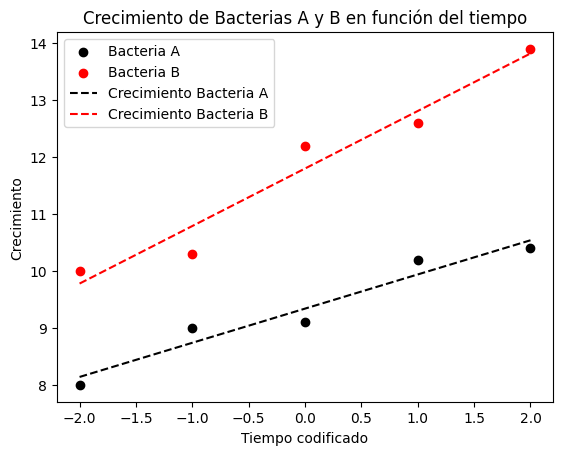

In [43]:
beta_0, beta_1, beta_2, beta_3 = results.params

tiempo_grafica = np.linspace(-2, 2, 100)

crecimiento_A = beta_0 + beta_2 * tiempo_grafica
crecimiento_B = beta_0 + beta_1 + (beta_2 + beta_3) * tiempo_grafica

plt.scatter(tiempo, bacteria_A, color='black', label='Bacteria A')
plt.scatter(tiempo, bacteria_B, color='red', label='Bacteria B')
plt.plot(tiempo_grafica, crecimiento_A, color='black', linestyle='--', label='Crecimiento Bacteria A')
plt.plot(tiempo_grafica, crecimiento_B, color='red', linestyle='--', label='Crecimiento Bacteria B')

plt.xlabel('Tiempo codificado')
plt.ylabel('Crecimiento')
plt.legend()
plt.title('Crecimiento de Bacterias A y B en función del tiempo')
plt.show()

c)

In [44]:
x2_0 = 0

crecimiento_A_0 = beta_0 + beta_2 * x2_0
crecimiento_B_0 = beta_0 + beta_1 + (beta_2 + beta_3) * x2_0

print(f"Predicción de crecimiento para Bacteria A en x2 = 0: {crecimiento_A_0}")
print(f"Predicción de crecimiento para Bacteria B en x2 = 0: {crecimiento_B_0}")


Predicción de crecimiento para Bacteria A en x2 = 0: 9.34
Predicción de crecimiento para Bacteria B en x2 = 0: 11.8


d) Para probar esto, se observa el $p-value$ de $\beta_1$ y $\beta_2$ en el resumen del modelo. Los dos $p-value$'s son menores que el nivel de significancia ($\alpha=0.05$), entonces se rechaza la hipótesis nula, i.e., las pendientes son diferentes, el tiempo afecta de manera diferente a las dos bacterias.

# Problema 12:

Supongamos que deseas analizar la diferencia en las calificaciones obtenidas por tres grupos de estudiantes en un examen de matemáticas. Los grupos son: "Grupo A", "Grupo B" y "Grupo C". Tienes los datos de las calificaciones obtenidas por cada estudiante en un archivo CSV llamado "calificaciones.csv".

Haz una prueba Anova para ver si hay diferencia en calificaciones de los tres grupos.

In [45]:
data = pd.read_csv('datos.csv')

grupo_A = data[data['Grupo'] == 'Grupo A']['Datos']
grupo_B = data[data['Grupo'] == 'Grupo B']['Datos']

f_stat, p_value = stats.f_oneway(grupo_A, grupo_B)

print(f'Estadístico F: {f_stat}')
print(f'Valor p: {p_value}')

alpha = 0.05
if p_value < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa entre los grupos.")
else:
    print("No rechazamos la hipótesis nula: No hay una diferencia significativa entre los grupos.")


Estadístico F: 0.017511360676141122
Valor p: 0.8973476766572029
No rechazamos la hipótesis nula: No hay una diferencia significativa entre los grupos.


# Problema 13:

Supongamos que tienes dos grupos de datos: "Grupo A" y "Grupo B", y deseas determinar si hay una diferencia significativa entre las medianas de ambos grupos. No sabes si los datos provienene de distribución normal.

a) Has una prueba gráfica y una prueba de hipótesis para saber si los datos tienen una distribución normal para ambos grupos.

b) Emplea estadística no paramétrica para probar si hay diferencia significativa en la mediana entre ambos grupos.

Los datos están en el archivo datos.csv

a)

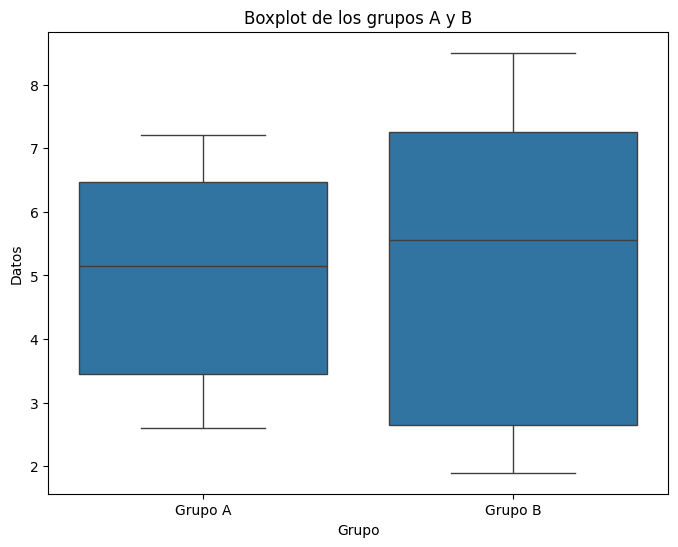

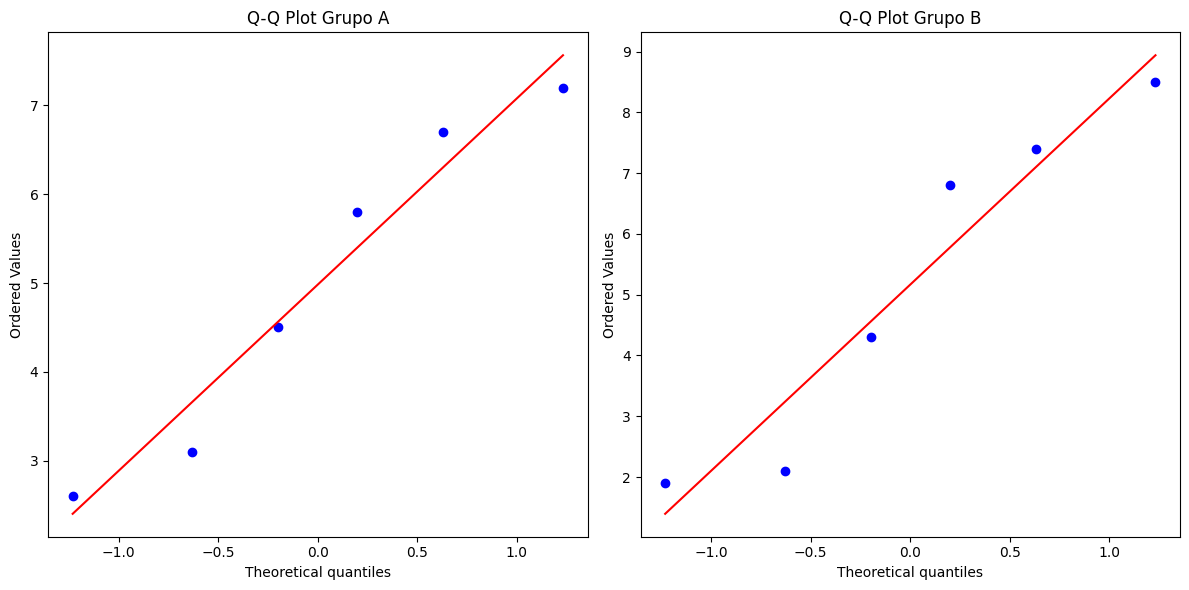

Prueba de Shapiro-Wilk para Grupo A: Estadístico = 0.9267433887989509, p-valor = 0.5551977358822437
Prueba de Shapiro-Wilk para Grupo B: Estadístico = 0.8947595168505995, p-valor = 0.34388057905496705


In [46]:
import seaborn as sns

grupo_A = data[data['Grupo'] == 'Grupo A']['Datos']
grupo_B = data[data['Grupo'] == 'Grupo B']['Datos']

plt.figure(figsize=(8, 6))
sns.boxplot(x='Grupo', y='Datos', data=data)
plt.title('Boxplot de los grupos A y B')
plt.show()

from scipy.stats import probplot

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
probplot(grupo_A, dist="norm", plot=plt)
plt.title('Q-Q Plot Grupo A')

plt.subplot(1, 2, 2)
probplot(grupo_B, dist="norm", plot=plt)
plt.title('Q-Q Plot Grupo B')

plt.tight_layout()
plt.show()

shapiro_A = stats.shapiro(grupo_A)
shapiro_B = stats.shapiro(grupo_B)

print(f"Prueba de Shapiro-Wilk para Grupo A: Estadístico = {shapiro_A[0]}, p-valor = {shapiro_A[1]}")
print(f"Prueba de Shapiro-Wilk para Grupo B: Estadístico = {shapiro_B[0]}, p-valor = {shapiro_B[1]}")

b)

In [47]:
u_stat, p_value_u = stats.mannwhitneyu(grupo_A, grupo_B)

print(f'Estadístico U de Mann-Whitney: {u_stat}')
print(f'Valor p de Mann-Whitney: {p_value_u}')

alpha = 0.05
if p_value_u < alpha:
    print("Rechazamos la hipótesis nula: Hay una diferencia significativa entre las medianas de los dos grupos.")
else:
    print("No rechazamos la hipótesis nula: No hay una diferencia significativa entre las medianas de los dos grupos.")

Estadístico U de Mann-Whitney: 17.0
Valor p de Mann-Whitney: 0.9372294372294373
No rechazamos la hipótesis nula: No hay una diferencia significativa entre las medianas de los dos grupos.


El $p-value$ es mayor que 0.05 para ambos casos, no rechazamos la hipótesis nula, lo que indica que los datos podrían ser normales.